# EXPLORATORY DATA ANALYSIS ON A DATASET

## Data Cleaning and Preparation:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Assignment Questions\EDA1\Cardiotocographic.csv')
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [13]:
# Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Alternatively, fill missing values with a specific value
df.fillna(value={'column_name': 'default_value'}, inplace=True)
df


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [19]:
# Detect and Treat Outliers
from scipy import stats
import numpy as np

# Compute Z-scores of numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Filter out outliers
df_cleaned = df[~outliers]


In [20]:
# Calculate IQR for each numeric column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out outliers
df_cleaned = df[~outliers]
df_cleaned


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.000000,2.1,0.000000,10.4,130.000000,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.000000,2.1,0.000000,13.4,130.000000,0.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.000000,2.4,0.000000,19.9,117.000000,1.000000,1.0
59,144.000000,0.008143,0.000000,0.006595,0.000000,0.0,0.0,33.000000,1.1,-0.060411,6.2,100.000000,1.000000,1.0
61,146.000000,0.004580,-0.001776,0.004580,0.000000,0.0,0.0,39.000000,0.8,21.000000,5.2,28.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,136.000000,0.000000,0.001294,0.006468,0.000000,0.0,0.0,74.000000,1.0,21.000000,7.0,42.000000,1.000000,1.0
2108,136.000000,0.000000,0.002567,0.007702,0.001284,0.0,0.0,66.449294,2.2,0.000000,4.4,44.444597,1.000000,1.0
2113,136.000000,0.000000,0.002070,0.008282,0.000000,0.0,0.0,67.000000,1.5,11.000000,4.7,38.000000,0.000000,1.0
2117,140.000000,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.000000,0.3,20.000000,8.5,26.000000,1.002932,1.0


## Statistical Summary:

In [21]:
# Statistical Summary
summary = df.describe()
print(summary)

                LB           AC           FM           UC           DL  \
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000   
mean    133.404937     0.003339     0.004384     0.004381     0.001612   
std       9.911990     0.003814     0.013918     0.002874     0.002586   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.002063     0.000000   
50%     133.000000     0.001918     0.000000     0.004532     0.000000   
75%     141.000000     0.005930     0.002502     0.006579     0.002638   
max     160.000000     0.016000     0.189320     0.013861     0.011837   

                 DS           DP         ASTV        MSTV         ALTV  \
count  1.758000e+03  1758.000000  1758.000000  1758.00000  1758.000000   
mean   6.623924e-09     0.000049    45.846449     1.25711     8.877051   
std    5.806159e-07     0.000263    16.437991     0.73943    15.857365   
min   -6.650000e-06    -0.000045    1

## Data Visualization:

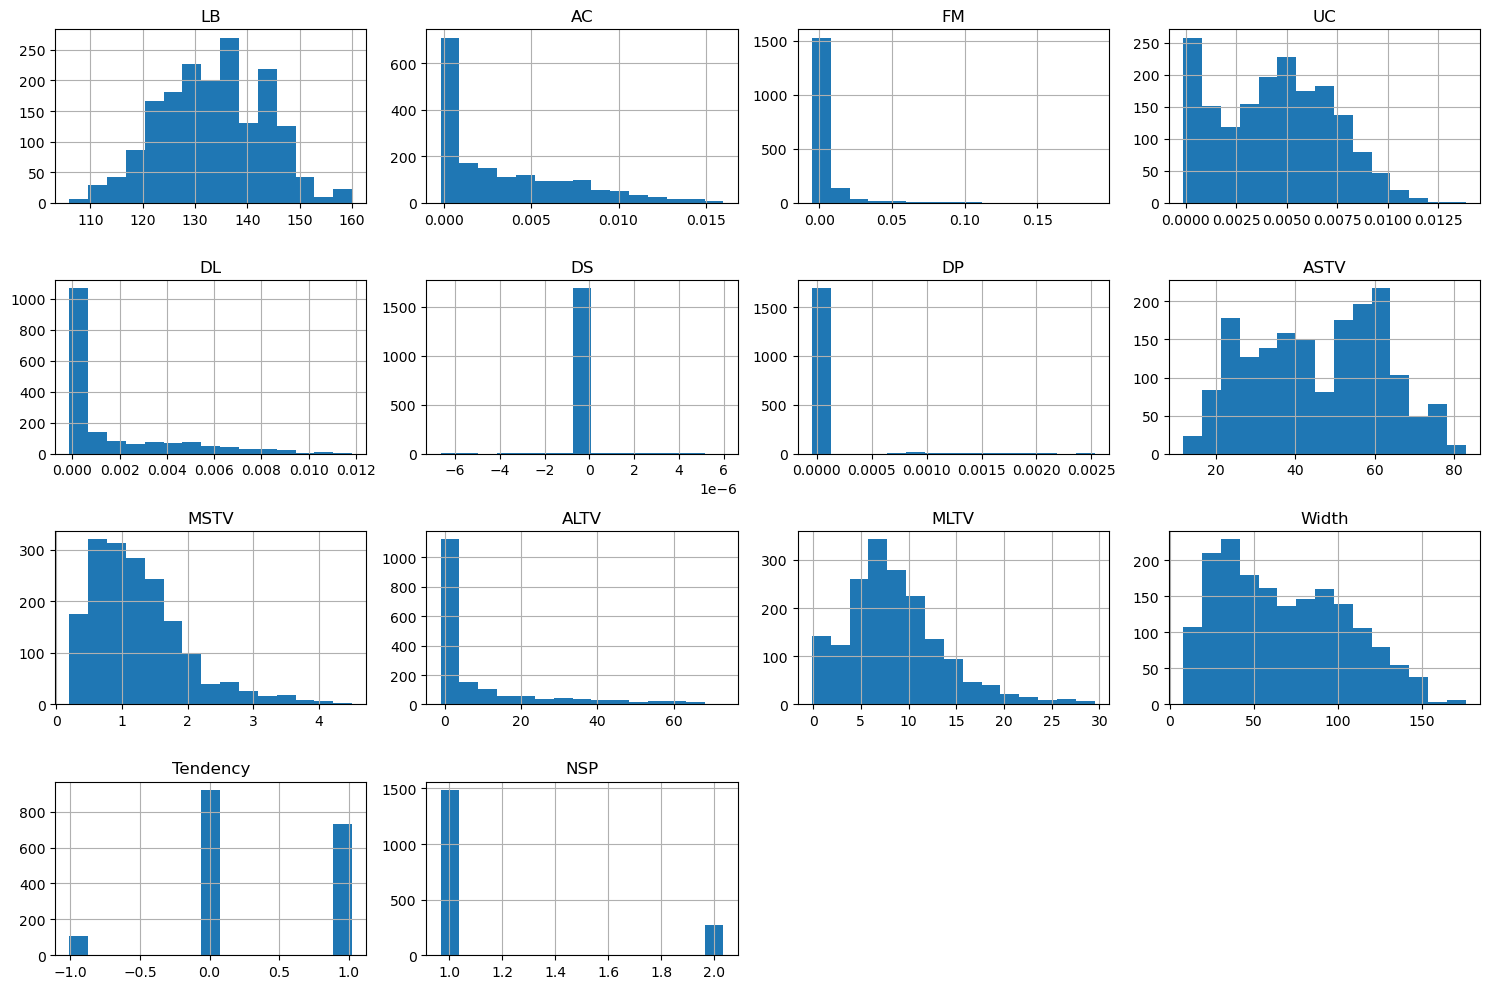

In [22]:
# Data Visualization
import matplotlib.pyplot as plt

# Adjust layout to fit 14 histograms
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


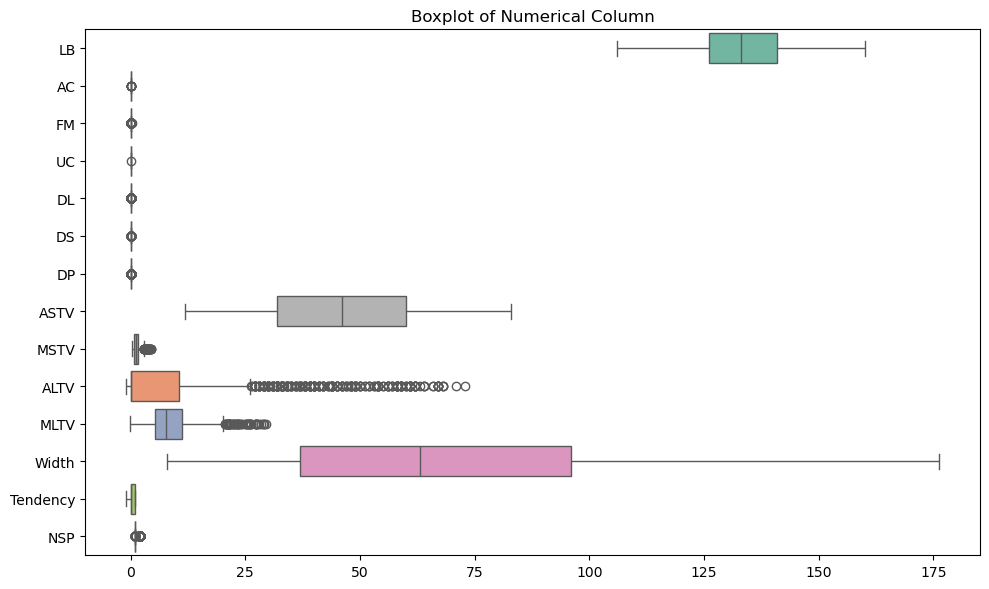

In [50]:
# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,orient='h',palette='Set2')
plt.title('Boxplot of Numerical Column')
plt.tight_layout()
plt.show()


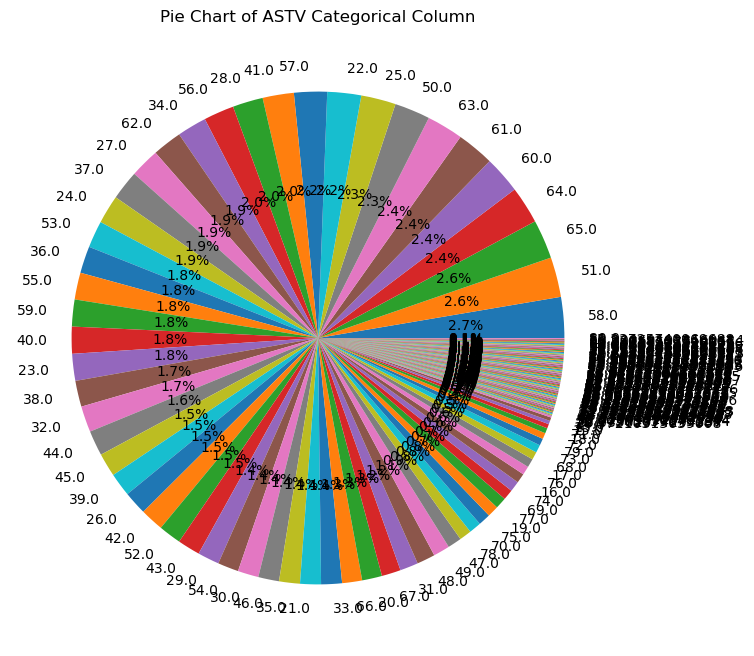

In [42]:
# Plot pie chart
plt.figure(figsize=(8, 8))
df['ASTV'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('Pie Chart of ASTV Categorical Column')
plt.ylabel('')
plt.show()

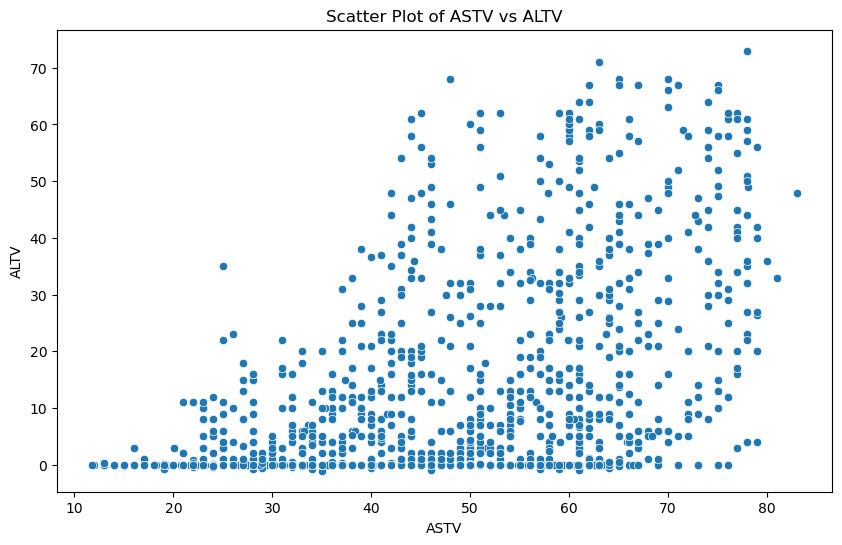

In [43]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ASTV', y='ALTV', data=df)
plt.title('Scatter Plot of ASTV vs ALTV')
plt.xlabel('ASTV')
plt.ylabel('ALTV')
plt.show()


In [1]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


NameError: name 'plt' is not defined

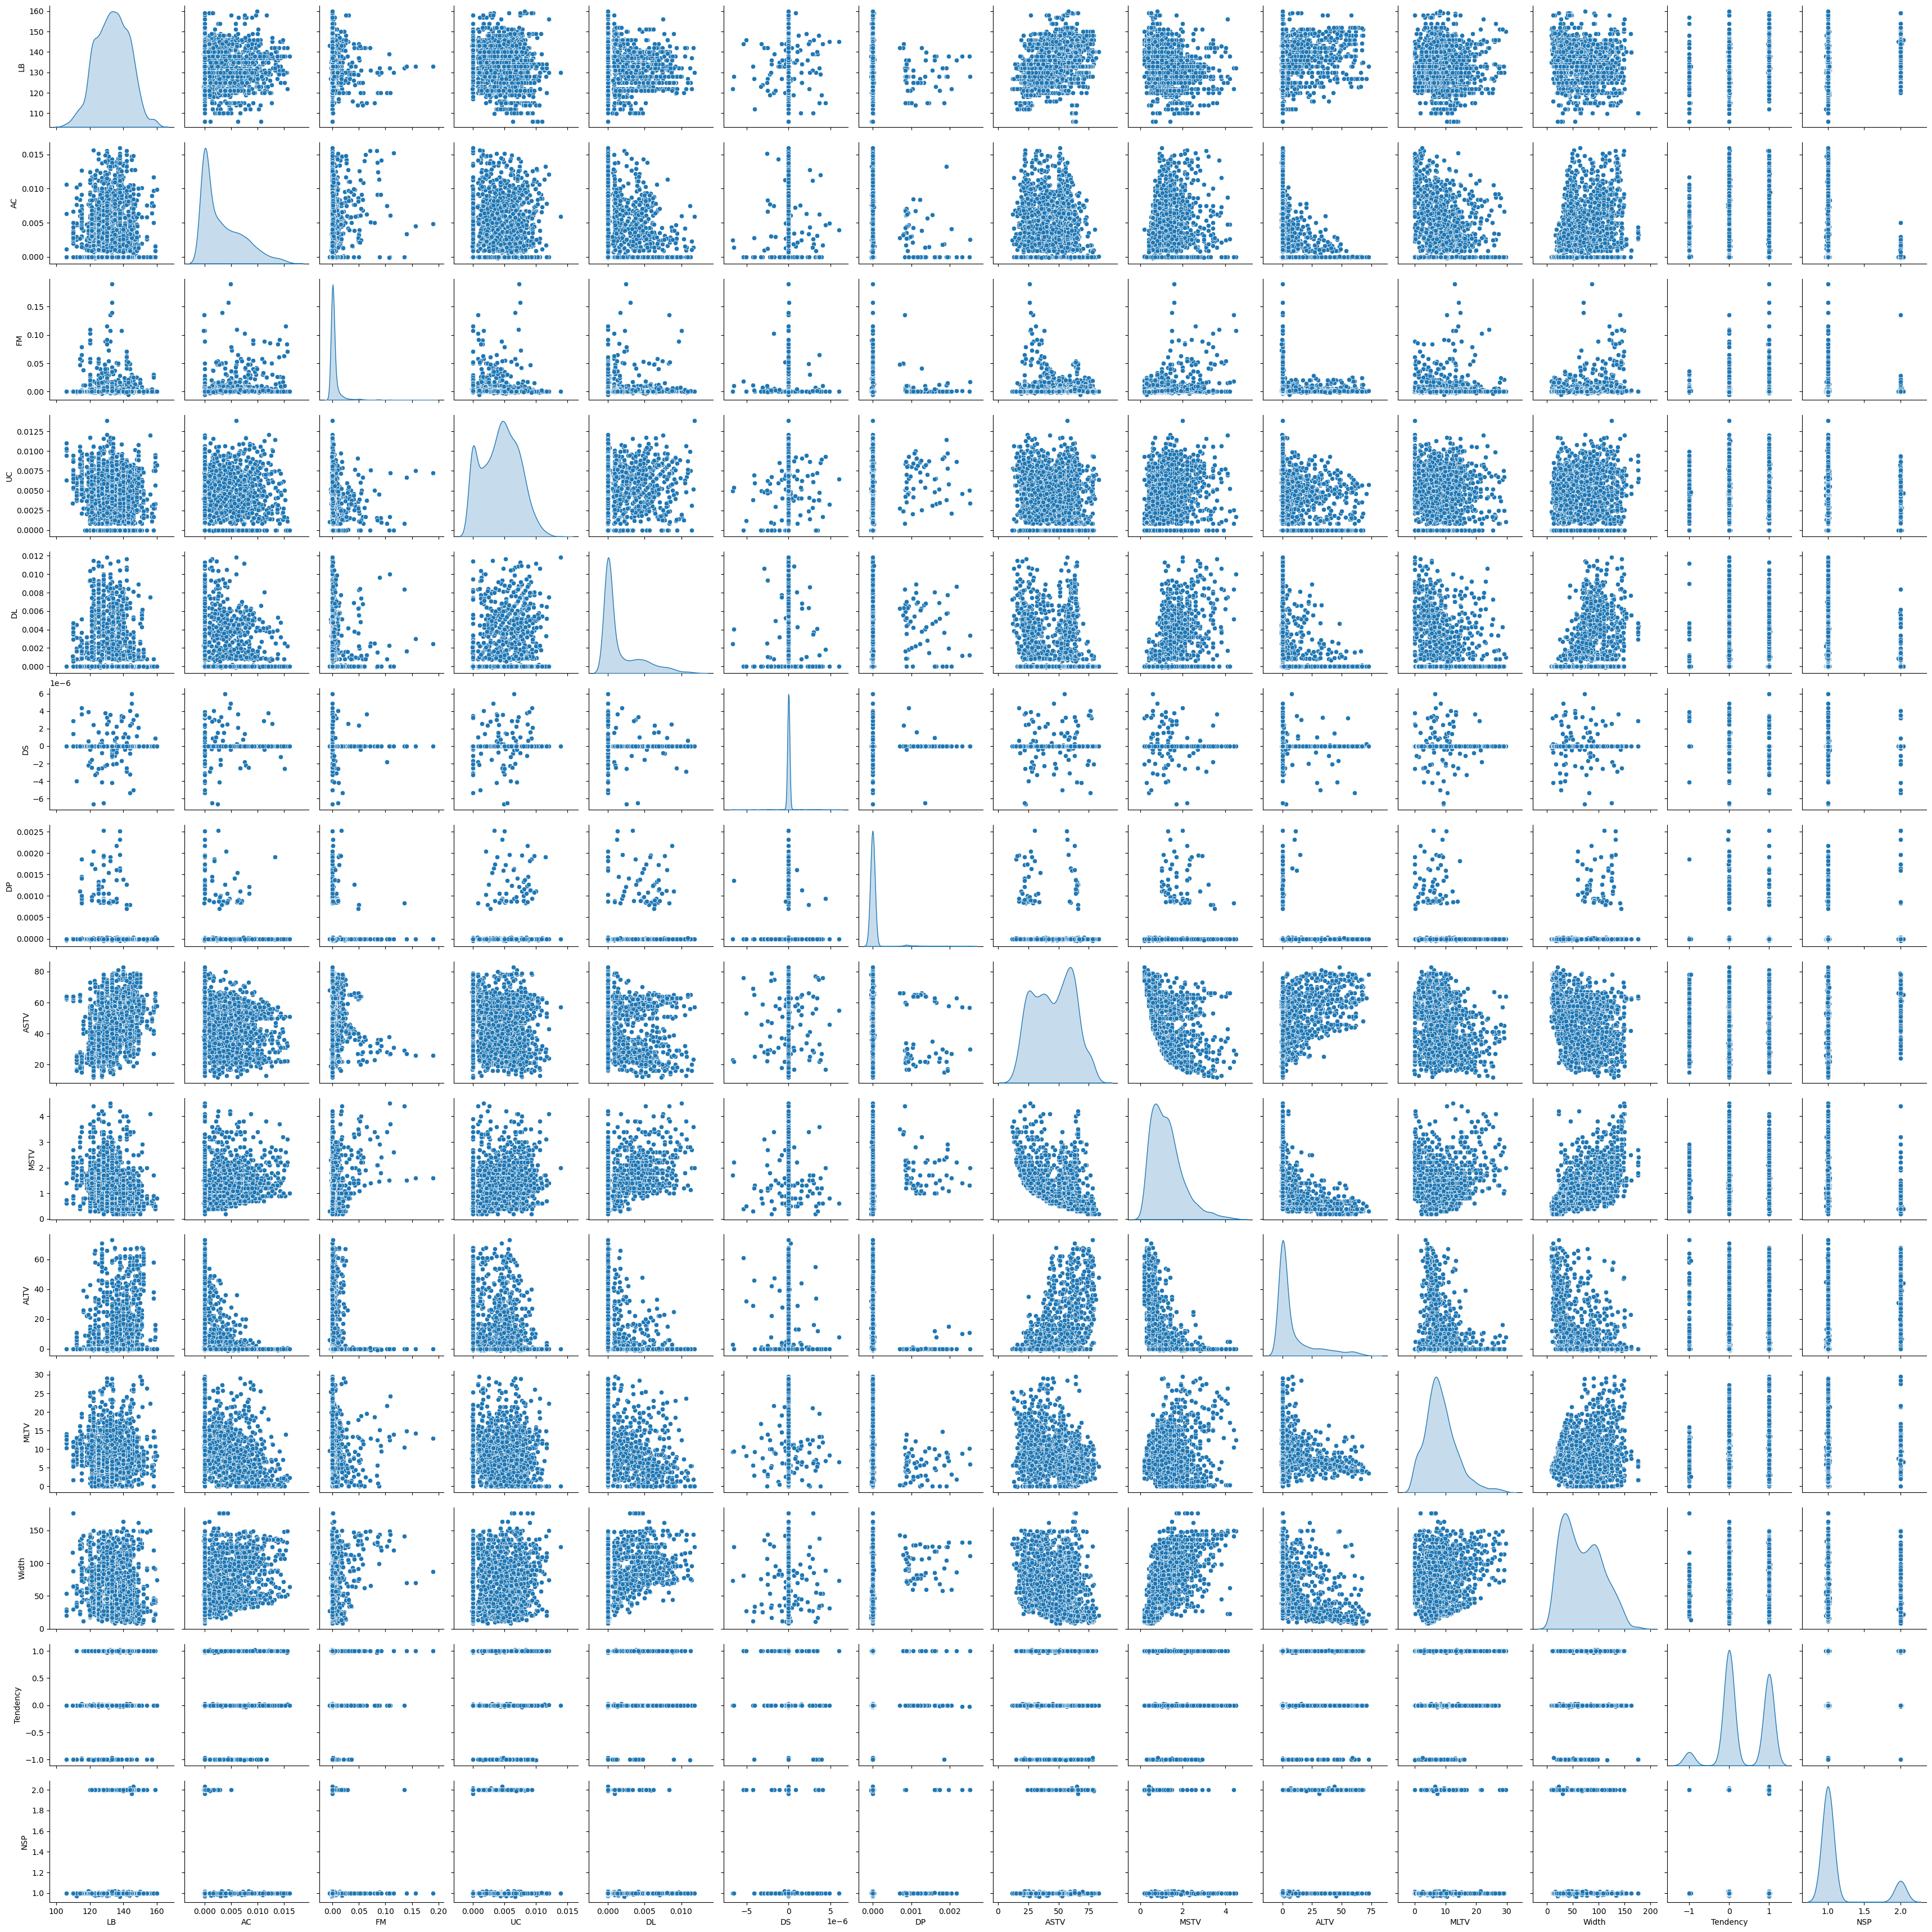

In [48]:
# Pair plot for deeper insights
sns.pairplot(df, diag_kind='kde', palette='husl')
plt.show()

In [54]:
# Compute correlation matrix
corr = df.corr()
print(corr)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.093409 -0.048884 -0.155012 -0.103521  0.029552   
AC       -0.093409  1.000000  0.166394  0.085885 -0.076404  0.020187   
FM       -0.048884  0.166394  1.000000 -0.158890  0.014713 -0.002886   
UC       -0.155012  0.085885 -0.158890  1.000000  0.259987  0.040072   
DL       -0.103521 -0.076404  0.014713  0.259987  1.000000 -0.009851   
DS        0.029552  0.020187 -0.002886  0.040072 -0.009851  1.000000   
DP       -0.094004 -0.052468  0.027765  0.118347  0.196302 -0.001449   
ASTV      0.348075 -0.244151 -0.030865 -0.202935 -0.160376  0.014599   
MSTV     -0.301197  0.268043  0.232065  0.238038  0.545592 -0.012743   
ALTV      0.307212 -0.404286 -0.066323 -0.246734 -0.252125 -0.040215   
MLTV     -0.072385 -0.210880  0.022506 -0.062514 -0.169214 -0.002730   
Width    -0.116678  0.343222  0.212754  0.069719  0.496351 -0.008940   
Tendency  0.285265 -0.011263  0.050859 -0.089167  0.149180 -0.02

## Conclusion

In [55]:
# Summarize insights
insights = """
Key Insights
- Variables such as LB, AC, FM, UC, etc., show different distributions.
- Correlation heatmap reveals relationships between several variables.
- Pair plots give deeper insights into the relationships and distributions.
- Further analysis could focus on specific patterns identified in the data.
"""
print(insights)


Key Insights
- Variables such as LB, AC, FM, UC, etc., show different distributions.
- Correlation heatmap reveals relationships between several variables.
- Pair plots give deeper insights into the relationships and distributions.
- Further analysis could focus on specific patterns identified in the data.



In [ ]:
## 

In [ ]:
# Save the report and visualizations (optional)
summary.to_csv('statistical_summary.csv')
correlations.to_csv('correlations.csv')